# Séries Temporais (STs)

O intervalo de coleta dos dados de uma série temporal deve ser regular (único em toda série. Ex. diário, mensal, por hora, etc)

As séries podem ser estacionárias (flutuam em torna de mesma média/variância) ou não estacionárias. Além disso, podem ser estocásticas (tem um fator aleatório) ou determinísticas. Podem também ter ciclos (duram mais que efeitos sazonais e os picos tendem a ser maiores).

 Podem existir em séries temporais: tendência, sazonalidade e aleatoriedade. Esses componentes podem ser separados por meio de decomposição.

 Séries temporais podem possibilitar fazer previsões de tendência (forecastings) e detecção de anomalias.

 ARIMA é uma técnica bastante usada. Ela requer dados estacionários (há funções que convertem dados não estacionários para estacionários). É composto por 3 elementos:

 1. AR (Autoregressivo ou P): avalia relação entre os períodos
 2. I (Integrated ou D): Aplica diferenciação, se necessária para transformar os dados em estacionários.
 3. MA (Move Average ou Q): avalia erros entre períodos e os extrai

O ARIMA gera métricas e há vários modelos disponíveis. O objetivo é minimizar esses índices. Para isso, é feita uma testagem de várias combinações dos parâmetros PDQ.

- Modelo AIC e AICc (Akaike Information Criteria)
- Modelo BIC (Bayesian Information Criteria)



In [10]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
register_matplotlib_converters()

In [11]:
base = pd.read_csv('/content/AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [13]:
date_parse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('/content/AirPassengers.csv', 
                   parse_dates=['Month'], 
                   index_col='Month', 
                   date_parser=date_parse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [15]:
ts = base['#Passengers']

In [16]:
# selecting element by date
print(ts['1949-02'])
# selecting element by position
print(ts[1])

Month
1949-02-01    118
Name: #Passengers, dtype: int64
118


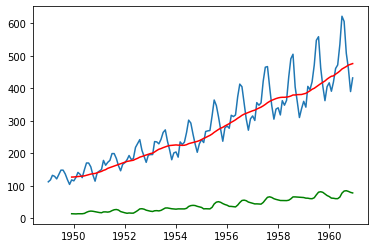

In [17]:
plt.plot(ts)
# The first way of visualizing the trend and seasonality is by representing the rolling mean and rolling average.

# There is an increasing trend over time
plt.plot(ts.rolling(window=12).mean(), color='red', label='Rolling mean')
plt.plot(ts.rolling(window=12).std(), color='green', label='Rolling std')

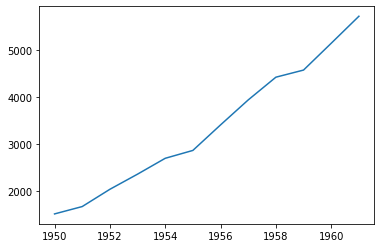

In [18]:
# consolida por ano (soma por ano)
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

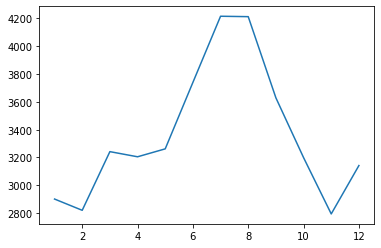

In [19]:
# agrupa por mes
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

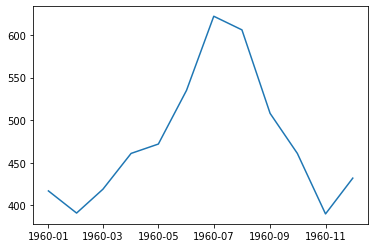

In [20]:
# range de datas especificas
ts_dates = ts['1960-01-01':'1960-12-01']
plt.plot(ts_dates)

### Decomposition (Tendency, Seasonality and Residuals)

In [21]:
decomposition = seasonal_decompose(ts)
decomposition

In [22]:
# Nos inicio e no fim esta NAN porque nao foi detectada tendencia.
print('Tendency:', decomposition.trend)

Tendency: Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64


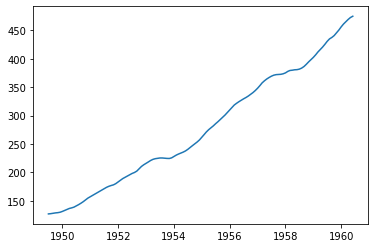

In [23]:
plt.plot(decomposition.trend)

In [24]:
print('Seasonality:', decomposition.seasonal)

Seasonality: Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64


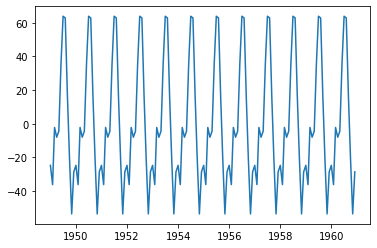

In [25]:
plt.plot(decomposition.seasonal)

In [27]:
print('Residuals:', decomposition.resid)

Residuals: Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64


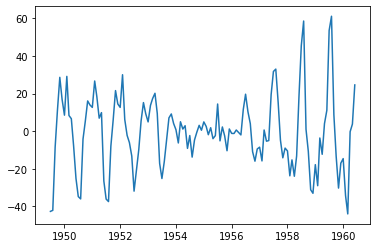

In [28]:
# residuos: dados que nao fazem parte da tendencia, nem da sazonalidade
plt.plot(decomposition.resid)

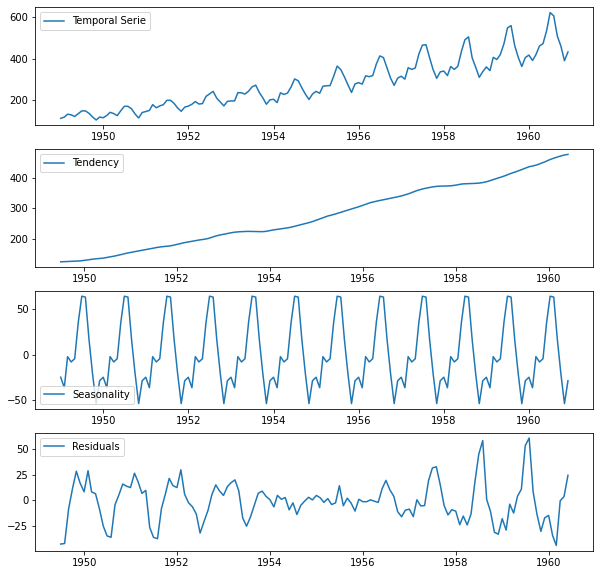

In [136]:
# charts together (# 4 charts 1 line)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 10))
plt.subplot(4, 1, 1) 
plt.plot(ts, label='Temporal Serie')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendency')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

### Augmented Dickey-Fuller Test  (ADF Test for stationarity)

It is used to determine if the time-series data is stationary.
We shoudl set a significance level and draw conclusions based on the resulting p-value.

- Null Hypothesis: The data is not stationary.
- Alternative Hypothesis: The data is stationary.


In [30]:
dftest = adfuller(ts, autolag="AIC")
print(dftest)
print("Results of Dickey-Fuller Test:")
dfoutput = pd.Series(dftest[0:4],
                     index=[
                         "Test Statistic",
                         "p-value",
                         "Lags Used",
                         "Number of Observations Used",
                         ],
                     )

for key, value in dftest[4].items():
  dfoutput["Critical Value (%s)" % key] = value

# Results indicate that the p-value is 0.992, meaning that it is very likely that the data is not stationary.
print(dfoutput)


(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Forecasting with ARIMA (AutoRegressive Integrated Moving Average)

https://towardsdatascience.com/creating-an-arima-model-for-time-series-forecasting-ff3b619b848d 

It is a class of statistical models for analyzing and forecasting time series data.

AR models make forecasting based only on the past values whilst MA models make forecasting based on the past errors in the series (also knows as lag errors.

We can combine both models to generate an ARMA model ARIMA which means to look at AR models recursively back through time, what generates a collection of short memory effects (errors). The correlation between AR and MA can be made performed using some techniques: MINIC, SCAN and ESACF. 

Lastly, to make the data stationary you can apply transformations what is represented by I the acronymum ARIMA. So, we have:

- AR: Autoregression. That is the relationship between current data and its past values. The number of preceding inputs used to predict the next value is called order and is usually referred to as p. In other words, the current value of the series can be explained as a linear combination of the past p values.

- I: Integrated. The use of differencing of raw observations in order to make the time series stationary. In practice, there is always some degree of uncertainty about “stationarity”, since you are only observing the realisations, and do not know the real stochastic process random variables. This uncertainty means you just approximately see it’s stationary.
A stationary time-series is defined as a time-series whose properties do not depend on the time at which the series is observed. In a more mathematical sense, a time-series is stationary when the covariance is independent of time and it has a constant mean and variance over time.

- MA: Moving Average. It uses the dependency between an observation and a residual error from a moving average applied to lagged observation. In other words, MA is modeling the forecast value as a linear combination of the past error terms. The moving average (MA) model doesn’t use past forecasts to predict future values whereas it uses the errors from the past forecasts.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA (p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order. Lags are past observations.

- d: The number of times that the raw observations are differenced, also called the degree of differencing. The data is prepared by a degree of differencing in order to make it stationary.

- q: The size of the moving average window, also called the order of moving average.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way you can also generate AR models (forecasting based only on the past values) or MA models (forecasting based on the past errors in the series. Also knows as lag errors). 

In general, it is a good practice to follow the next steps when doing time-series forecasting:

- Step 1 — Check Stationarity: If a time series has a trend or seasonality component, it must be made stationary.
- Step 2 — Determine the d value ( (Integrated): If the time series is not stationary, it needs to be stationarized through differencing.
- Step 3 — Select AR and MA terms: Use the ACF and PACF (partial autocorrelation function plot) to decide whether to include an AR term, MA term, (or) ARMA.
- Step 4 — Build the model

There is a function that seeks to identify the most optimal parameters for an ARIMA model: auto_arima

In [31]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.4 MB/s eta 0:00:00


#### auto_arima

In [32]:
from pmdarima.arima import auto_arima

In [33]:
stepwise_by_auto_arima = auto_arima(ts, 
                                    m=12,
                                    seasonal=True, 
                                    trace=True,
                                    stepwise=True)

# You can adjust some parameters. 
# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
# https://www.kaggle.com/code/ceruttivini/store-sales-forecasting-arima-and-autoarima
# For instance:
#stepwise_by_auto_arima = auto_arima(ts, 
#                                start_p=1, # The starting value of p, the order (or number of time lags) of the auto-regressive (“AR”) model. Default 2.
#                                start_q=1, # The starting value of q, the order of the moving-average (“MA”) model. Default 2.
#                                start_d=0, # The order of first-differencing. If None (by default), the value will automatically be selected based on the results of the tests 
#                                start_P=0, # The starting value of P, the order of the auto-regressive portion of the seasonal model.
#                                max_p=6, 
#                                max_q=6, 
#                                m=12,  # The period for seasonal differencing: 4 for quarterly data, 12 for monthly data, or 1 for annual. Default is 1. Note that if m == 1 seasonal will be set to False.
#                                seasonal=True, #Whether to fit a seasonal ARIMA. Default is True. 
#                                trace=True, 
#                                stepwise=True #Whether to use the stepwise algorithm to identify the optimal model parameters. It can be significantly faster than fitting all combinations (when set to False)
#)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=3.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.47 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=2.30 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.77 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=3.27 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.42 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.84 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=1.86 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=1.68 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=3.27 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.28 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.20 sec
 ARIMA(3,1,1)(0,1,0

In [34]:
# AIC is a metric to assess how the model is good. The minimum the better.
print(stepwise_by_auto_arima.aic())

1017.8467848726739


In [35]:
# dividing data between train and test

train = ts.loc['1949-01-01':'1959-12-01']
test = ts.loc['1960-01-01':]

In [36]:
train

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
Name: #Passengers, Length: 132, dtype: int64

In [37]:
test

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [38]:
# Let's train the model!!! Uhhh
stepwise_by_auto_arima.fit(train)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [39]:
next_year_forecast = stepwise_by_auto_arima.predict(n_periods=12)
next_year_forecast

1960-01-01    425.135147
1960-02-01    408.815436
1960-03-01    471.901435
1960-04-01    462.399948
1960-05-01    486.128077
1960-06-01    538.276346
1960-07-01    614.195485
1960-08-01    625.239584
1960-09-01    529.215534
1960-10-01    473.228650
1960-11-01    428.221497
1960-12-01    471.225398
Freq: MS, dtype: float64

In [40]:
# Let's compare the next year forecasting (1960) with the real 1960 data to check the model performance
#pandas.DataFrame(data, index, columns)
next_year_forecast_df = pd.DataFrame(next_year_forecast, index=test.index, columns=['#Passengers'])

<Axes: >

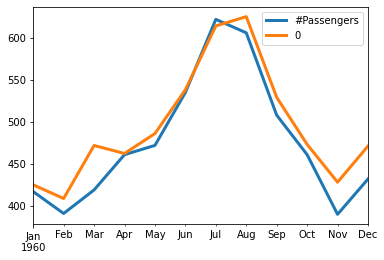

In [41]:
#blue: test, orange: forecasting
pd.concat([test, next_year_forecast], axis=1).plot(linewidth=3)

<Axes: >

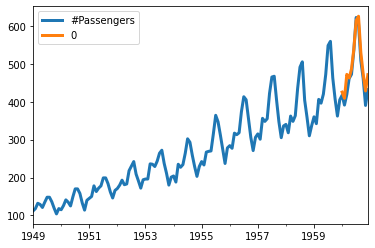

In [51]:
#Plotting all data with forecasting
pd.concat([ts, next_year_forecast], axis=1).plot(linewidth=3)

In [44]:
# predict next 24 months
next_year_forecast_1961 = stepwise_by_auto_arima.predict(n_periods=24)
next_year_forecast_1961

1960-01-01    425.135147
1960-02-01    408.815436
1960-03-01    471.901435
1960-04-01    462.399948
1960-05-01    486.128077
1960-06-01    538.276346
1960-07-01    614.195485
1960-08-01    625.239584
1960-09-01    529.215534
1960-10-01    473.228650
1960-11-01    428.221497
1960-12-01    471.225398
1961-01-01    491.358418
1961-02-01    475.039867
1961-03-01    538.125233
1961-04-01    528.624091
1961-05-01    552.352032
1961-06-01    604.500404
1961-07-01    680.419487
1961-08-01    691.463616
1961-09-01    595.439549
1961-10-01    539.452674
1961-11-01    494.445516
1961-12-01    537.449420
Freq: MS, dtype: float64

In [145]:
stepwise_by_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -447.483
Date:                             Sat, 25 Mar 2023   AIC                            902.967
Time:                                     17:28:56   BIC                            914.083
Sample:                                 01-01-1949   HQIC                           907.481
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5253      0.929     -0.566      0.572      -2.345       1.295
ar.L2          0.0110      0.275      0.040      0.968      -0.529       0.551
ma.L1          0.3064      0.935      0.328      0.743      -1.527       2.140
sigma2       108.0093     13.498      8.002      0.000      81.553     134.466
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.97   Prob(JB):                         0.50
Heteroskedasticity (H):               1.47   Skew:                            -0.09
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
next_year_1961 = [['1961-01-01 00:00:00', np.nan], 
                  ['1961-02-01 00:00:00', np.nan],
                  ['1961-03-01 00:00:00', np.nan],
                  ['1961-04-01 00:00:00', np.nan],
                  ['1961-05-01 00:00:00', np.nan],
                  ['1961-06-01 00:00:00', np.nan],
                  ['1961-07-01 00:00:00', np.nan],
                  ['1961-08-01 00:00:00', np.nan],
                  ['1961-09-01 00:00:00', np.nan],
                  ['1961-10-01 00:00:00', np.nan],
                  ['1961-11-01 00:00:00', np.nan],
                  ['1961-12-01 00:00:00', np.nan]]
next_year_1961_df = pd.DataFrame(next_year_1961, columns=['Date', '#Passengers'])
next_year_1961_df['Date'] = pd.to_datetime(next_year_1961_df['Date'])
next_year_1961_df.set_index('Date', inplace=True)
next_year_1961_df

,#Passengers
Date,
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN


In [114]:
next_year_1961_df

,0
Date,
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN


In [123]:
df_all_plus_1961 = pd.concat([pd.DataFrame(ts), next_year_1961_df], axis=1)
df_all_plus_1961 = df_all_plus_1961.iloc[:, 0:1]
df_all_plus_1961

,#Passengers
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN
1961-11-01,NaN


In [127]:
next_year_forecast_df = pd.DataFrame(next_year_forecast_1961, index=df_all_plus_1961.index, columns=['#Passengers'])
next_year_forecast_df

,#Passengers
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1961-08-01,691.463616
1961-09-01,595.439549
1961-10-01,539.452674
1961-11-01,494.445516


<Axes: >

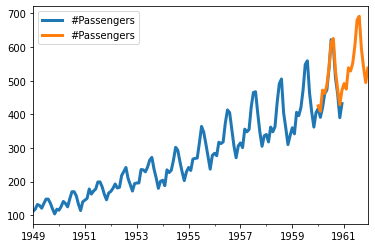

In [128]:
# blue: real
# orange: predicted
pd.concat([ts, next_year_forecast_df], axis=1).plot(linewidth=3)

### Sem auto-arima

Use the ACF and PACF to decide whether to include an AR term, MA term, (or) ARMA.

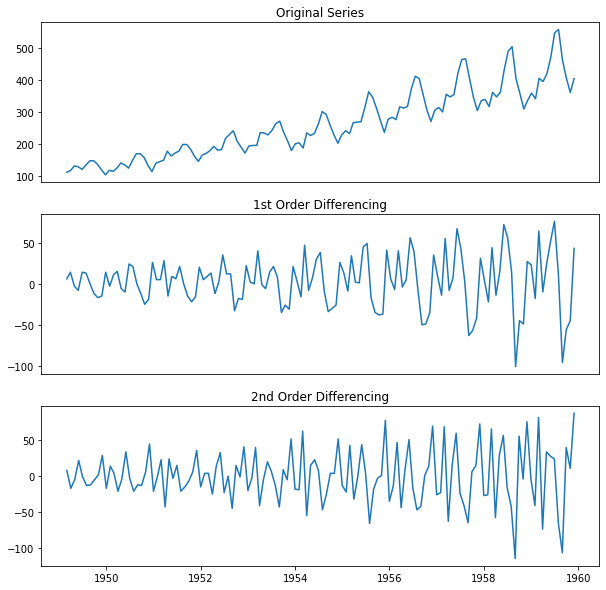

In [131]:
# Finding the value of the d (Integrated) parameter
# The ideia is to apply differentiation until we get a good result
# Since there is not a method that can tell us the optimal d value, let’s plot the first-order and second-order differencing
# After implementing differencing on the time-series, both the trend and seasonality have been reduced.

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
ax1.plot(train)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(train.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)

# 2nd Differencing
ax3.plot(train.diff().diff())
ax3.set_title('2nd Order Differencing')
plt.show()

Text(0.5, 1.0, 'Autocorrelation for second-order differencing')

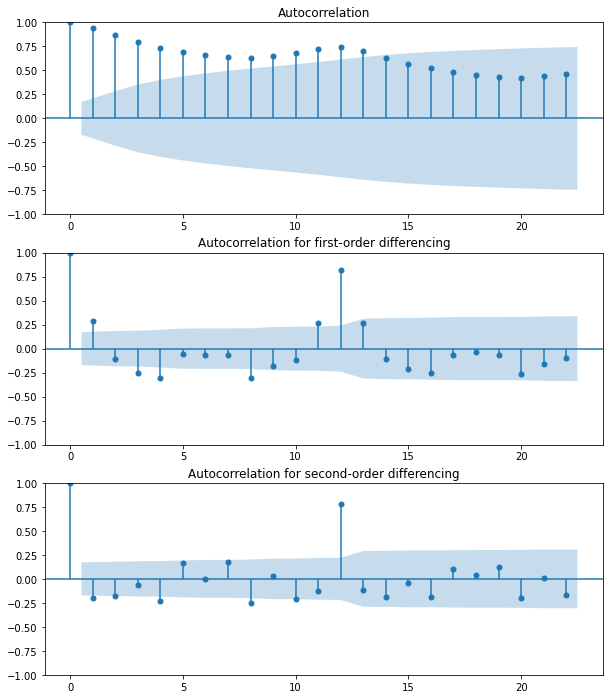

In [139]:
# It is also possible to assess the optimal d value using the autocorrelation plots.
# https://www.alpharithms.com/autocorrelation-time-series-python-432909/
# https://analyticsindiamag.com/an-overview-of-autocorrelation-seasonality-and-stationarity-in-time-series-data/
# https://www.youtube.com/watch?v=_nSvoCkodS8
# https://campus.datacamp.com/courses/visualizing-time-series-data-in-python/seasonality-trend-and-noise?ex=6 
# https://campus.datacamp.com/courses/visualizing-time-series-data-in-python/seasonality-trend-and-noise?ex=1
# https://www.youtube.com/watch?v=CAT0Y66nPhs
# https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14
# https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c 
# https://www.youtube.com/watch?v=gDwx3RPUfPw 
# Autocorrelation is a mathematical representation of the degree of similarity between a given time series and the lagged version of itself over successive time intervals. 
# Autocorrelation is a useful tool in detecting patterns of periodicity, seasonality, or other less intuitive sources of influence. 
# Autocorrelation (ACF) is a calculated value used to represent how similar a value within a time series is to a previous value.
# The ACF can be used to identify trends in data and the influence of previously observed values on a current observation.
# Autocorrelation estimates the influence of all past observed values on the currently observed value.
# This differs from partial autocorrelation in which only a single past observed value is measured for influence on the currently observed value.
# When there is a trend in the data, the autocorrelations for small lags tend to be large and positive, 
# slowly decreasing over time as the lags increase. 
# When there is a seasonality component within the time-series, the autocorrelations will be larger for the seasonal lags 
# (at multiples of the seasonal frequency) than for other lags.
# How to interpret the chart:
# The blue shaded region is the confidence interval with a default value of α = 0.05. 
# So, we will focus on the points that lie beyond the blue region as they signify strong statistical significance.
# Anything within this range represents a value that has no significant correlation with the most recent value for the data.
# The vertical lines with markers at their tops are the “lags” that represent measures of previous values. 
# These represent the correlation value (shown on the y-axis). The strength of this relationship is measured on 
# a scale of -1 to 1 when -1 being a 100% negative correlation and with a value of 1 being a 100% positive correlation.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

_ = plot_acf(train, ax=ax1)

_ = plot_acf(train.diff().dropna(), ax=ax2)
ax2.set_title('Autocorrelation for first-order differencing')

_ = plot_acf(train.diff().diff().dropna(), ax=ax3)
ax3.set_title('Autocorrelation for second-order differencing')

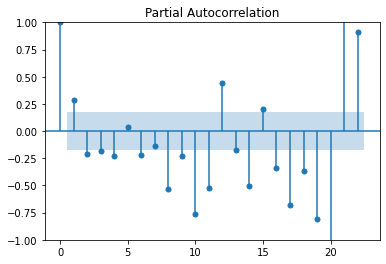

In [142]:
# Finding the value of the p (Autoregressive) parameter with the  PACF plot
# The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag.
_ = plot_pacf(train.diff().dropna(), alpha = 0.05)

# As there are many lags that are significant in the plot, we can select a high number of autoregressive terms

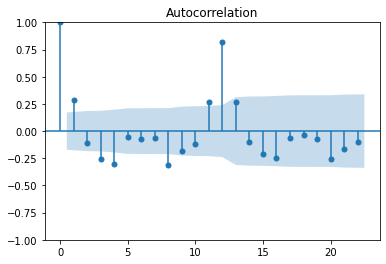

In [141]:
# Finding the value of the q (Moving average) parameter
# To find out the value of q, we can use the ACF plot
_ = plot_acf(train.diff().dropna())